In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
import arrayfire as af
from matplotlib import pyplot as plt

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import advection_2d
from dg_maxwell import global_variables as gvar
from dg_maxwell import utils
from dg_maxwell import wave_equation_2d as w2d
from dg_maxwell import isoparam
from dg_maxwell import lagrange

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [3]:
params.mesh_file = '../read_and_plot_mesh/mesh/particle_in_rectangle.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 896 nodes.
gmshTranslator: Mesh has 344 elements.
gmshTranslator: Processed 1244 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements


In [5]:
def function(xi):
    return af.sin(np.pi * xi)

# Example Usage

In [6]:
f_i = function(advec_var.xi_LGL)
fn_i = af.transpose(af.tile(f_i, d0 = 1, d1 = 1))

lagrange_interpolation = lagrange.lagrange_interpolation(fn_i, advec_var)

In [14]:
# Testing

xi_linsp = utils.linspace(-1, 1, 30)
function_analytical = function(xi_linsp)

function_interpolated_xi_linsp = utils.polyval_1d(lagrange_interpolation, xi_linsp)

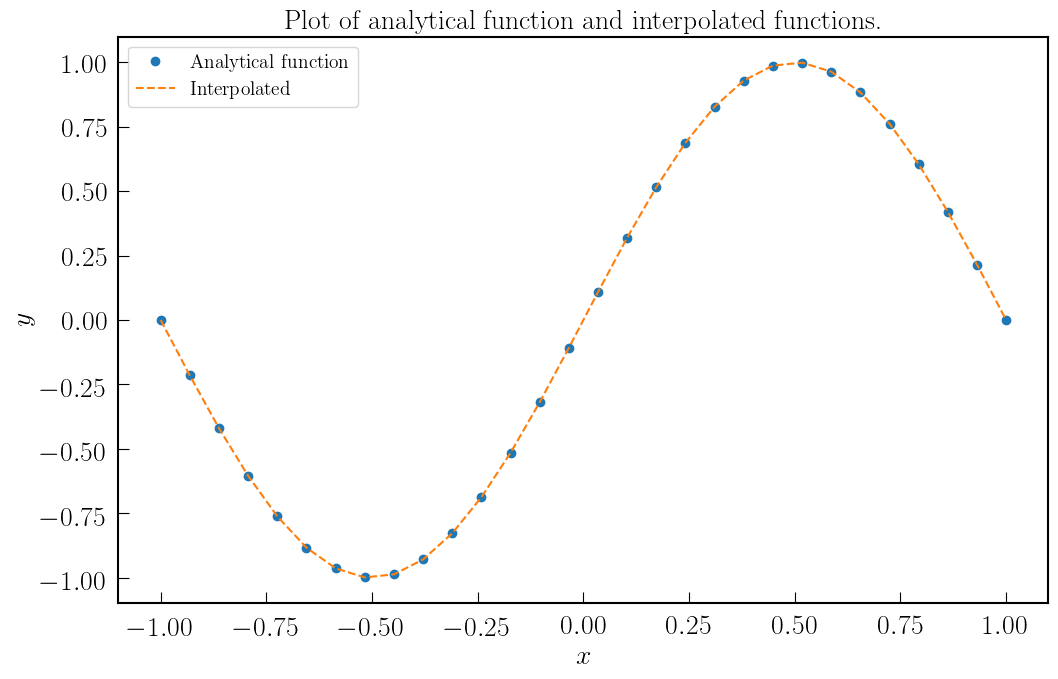

In [15]:
plt.plot(np.array(xi_linsp), np.array(function_analytical), 'o', label = 'Analytical function')
plt.plot(np.array(xi_linsp), np.array(af.transpose(function_interpolated_xi_linsp[0])), '--',
         label = 'Interpolated')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot of analytical function and interpolated functions.')
plt.legend(prop={'size': 14})
plt.show()

# Devel

In [17]:
f_i = function(advec_var.xi_LGL)
fn_i = af.transpose(af.tile(f_i, d0 = 1, d1 = 3))

# Lagrange interpolation
fn_i = af.transpose(af.reorder(fn_i, d0 = 2, d1 = 1, d2 = 0))
lagrange_interpolation = af.broadcast(utils.multiply, advec_var.lagrange_coeffs, fn_i)
lagrange_interpolation = af.reorder(af.sum(lagrange_interpolation, dim = 0),
                                    d0 = 2, d1 = 1, d2 = 0)

In [20]:
# Testing

xi_linsp = utils.linspace(-1, 1, 30)
function_analytical = function(xi_linsp)

function_interpolated_xi_linsp = utils.polyval_1d(lagrange_interpolation, xi_linsp)

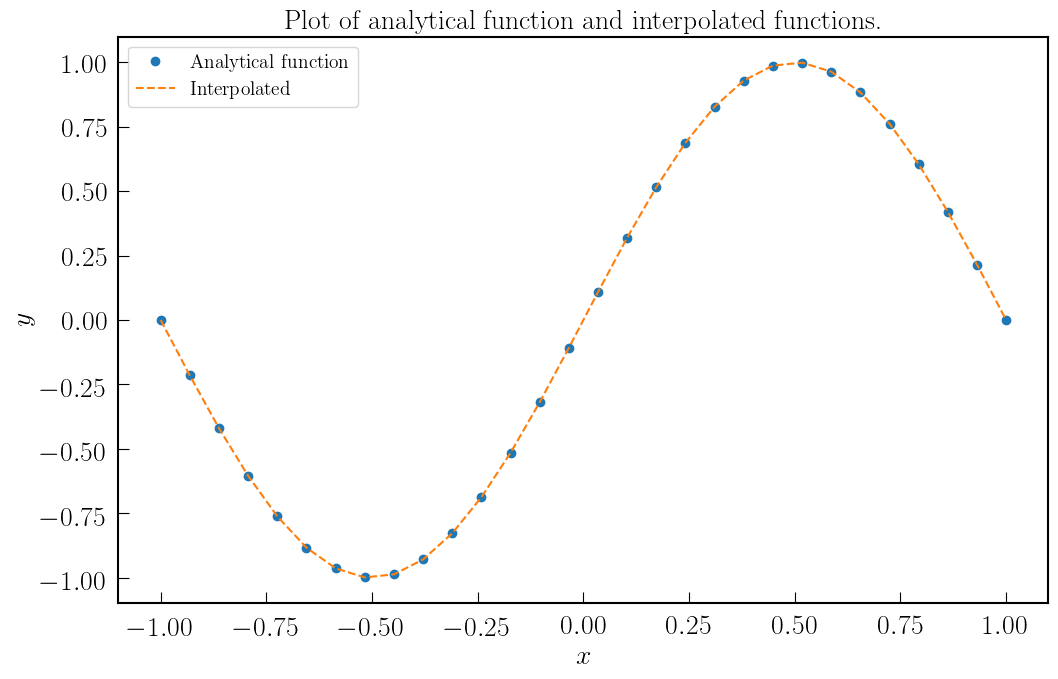

In [21]:
plt.plot(np.array(xi_linsp), np.array(function_analytical), 'o', label = 'Analytical function')
plt.plot(np.array(xi_linsp), np.array(af.transpose(function_interpolated_xi_linsp[0])), '--',
         label = 'Interpolated')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot of analytical function and interpolated functions.')
plt.legend(prop={'size': 14})
plt.show()